<h1> PROJECT DESRCIPTION </h1>
<ul><li> <h3>Context</h3> </li>

<h5>
The blockchain technology on which many cryptocurrencies are based, with its revolutionary distributed digital backbone, has many other promising applications. Implementations of secure, decentralized systems can aid us in conquering organizational issues of trust and security that have plagued our society throughout the ages. In effect, we can fundamentally disrupt industries core to economies, businesses and social structures, eliminating inefficiency and human error.</h5>
<h5>
This is an exciting time to become part of the crypto revolution and what better way than to start with some exploratory analysis of the crypto market using data science techniques?
</h5>
<h5>Bitcoin is the longest running and most well known cryptocurrency, first released as open source in 2009 by the anonymous Satoshi Nakamoto. Bitcoin serves as a decentralized medium of digital exchange, with transactions verified and recorded in a public distributed ledger (the blockchain) without the need for a trusted record keeping authority or central intermediary. Transaction blocks contain a SHA-256 cryptographic hash of previous transaction blocks, and are thus "chained" together, serving as an immutable record of all transactions that have ever occurred. As with any currency/commodity on the market, bitcoin trading and financial instruments soon followed public adoption of bitcoin and continue to grow.</h5>
<li> <h3>Content</h3> </li>
<h5>For the bitcoin data analysis, we are going to use the data fetched from the world's larget cryptocurrency exchange, Binance. The data will be of daily timeframe to exclude the lower time frame (LTF) volatility and exchange downtime and glitches.
This project covers the following :
<ol>
<li>Binance API setup</li>
<li>Installing dependencies</li>
<li>Authentication</li>
<li>Pulling Ticker dat from API</li>
<li>Pandas dataframe</li>
<li>Getting market depth from API :</li>
<ul>
<li>asks</li>
<li>bids</li>
</ul>
<li>Getting OHLCV data from API</li>
<li>Pre-process OHLCV data</li>
<li>Calculating mean, std, min, max, count</li>
<li>Price movement chart visualization using MPLFinance</li>
<li>Plotting moving averages along the chart
</li>
<li>Prettify charts </li>
</ol>
</ul>
</h5>


# Setting up API key and secret from Binance.com


In [1]:
apikey = 'APIKEY'
secret = 'APISECRET'


# Getting dependencies ready


In [2]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd


# Authenticating into binance account with API key and secret


In [3]:
client = Client(apikey, secret)
client


# Pulling Ticker data from binance API


In [4]:
tickers = Client(apikey, secret).get_all_tickers()
# pulling all the tickers available on binance.com

# Converting API data into pandas dataframe


In [5]:
df = pd.DataFrame(tickers)
df.head(50)


,symbol,price
0,ETHBTC,0.06858100
1,LTCBTC,0.00287200
2,BNBBTC,0.00993100
3,NEOBTC,0.00061700
4,QTUMETH,0.00237500
5,EOSETH,0.00084100
6,SNTETH,0.00002004
7,BNTETH,0.00085800
8,BCCBTC,0.07908100
9,GASBTC,0.00012800


In [6]:
df.tail(20)


,symbol,price
1922,XNOBUSD,1.93400000
1923,XNOUSDT,1.93600000
1924,COSTRY,0.19670000
1925,KAVAETH,0.00122900
1926,MCBNB,0.00627400
1927,ONETRY,2.08600000
1928,WOOBTC,0.00001131
1929,WOOBNB,0.00113900
1930,WOOBUSD,0.43250000
1931,WOOUSDT,0.43260000


In [7]:
# Setting 'symbol' as index
df.set_index('symbol', inplace=True)

In [8]:
df.head()


,price
symbol,
ETHBTC,0.06858100
LTCBTC,0.00287200
BNBBTC,0.00993100
NEOBTC,0.00061700
QTUMETH,0.00237500


In [9]:
df.tail()


,price
symbol,
TFUELBUSD,0.18050000
AXSTRY,710.80000000
DARTRY,11.50000000
NEARTRY,131.30000000
IDEXBNB,0.00046490


# Getting market depth for crypto pairs


In [10]:
# market depth for BTC/USDT pair
depth = client.get_order_book(symbol='BTCUSDT')


In [11]:
# market depth for ETHUSDT pair
depth1 = client.get_order_book(symbol='ETHUSDT')


# Getting market depth for asks (sell orders)


In [12]:
# market depth for BTCUSDT 'asks' i.e. sell prices
# for BTC/USDT traders are willing to sell for

depth_df = pd.DataFrame(depth['asks'])

# naming the columns 0 as Price and 1 as Volume explicitly
depth_df.columns = ['Price', 'Volume']
depth_df.head(20)


,Price,Volume
0,38214.71000000,0.53325000
1,38215.98000000,0.02644000
2,38215.99000000,0.00689000
3,38217.37000000,0.00394000
4,38218.53000000,0.19202000
5,38218.81000000,0.26188000
6,38220.37000000,0.05002000
7,38221.00000000,0.01000000
8,38221.27000000,0.02617000
9,38222.15000000,0.23609000


# Getting market depth for bids (buy orders)


In [13]:
# market depth for BTCUSDT 'bids' i.e. buy prices
# for BTC/USDT, traders are willing to buy for

depth_df = pd.DataFrame(depth['bids'])

# naming the columns 0 as Price and 1 as Volume explicitly
depth_df.columns = ['Price', 'Volume']
depth_df.head(20)


,Price,Volume
0,38214.70000000,2.12490000
1,38214.25000000,0.02644000
2,38214.24000000,0.02644000
3,38214.23000000,0.00415000
4,38213.01000000,0.13151000
5,38212.98000000,0.00919000
6,38212.13000000,0.22887000
7,38212.12000000,0.44134000
8,38211.01000000,0.10205000
9,38211.00000000,0.00296000


# Get historical OHLCV (Open, High, Low, Close, Volume) data


In [14]:
# OHLCV are the  price values for an asset which can be represented with the candlestick
# on different timeframes
# Getting OHLCV data of BTCUSDT from 1 Jun 2021 to 1 June 2021
# on daily timeframe
historical = client.get_historical_klines(
    'BTCUSDT', Client.KLINE_INTERVAL_1DAY, '2 Jan 2021', '1 june 2021')
# historical


# Displaying Historical data as dataframe


In [15]:
hist_df = pd.DataFrame(historical)
hist_df.head()

# this data is used to plot a single candlestick
# at a particular time interval
# on a specific timeframe chart


,0,1,2,3,4,5,6,7,8,9,10,11
0,1609545600000,29331.70000000,33300.00000000,28946.53000000,32178.33000000,129993.87336200,1609631999999,4073842163.67154117,2245922,67446.30524600,2110334723.88714587,0
1,1609632000000,32176.45000000,34778.11000000,31962.99000000,33000.05000000,120957.56675000,1609718399999,4057598425.49201649,2369698,59750.33287100,2004428433.93184622,0
2,1609718400000,33000.05000000,33600.00000000,28130.00000000,31988.71000000,140899.88569000,1609804799999,4429010349.69534487,2642408,69088.46923000,2173435409.01698791,0
3,1609804800000,31989.75000000,34360.00000000,29900.00000000,33949.53000000,116049.99703800,1609891199999,3743617144.64691529,2526851,59691.75475500,1927195093.64154965,0
4,1609891200000,33949.53000000,36939.21000000,33288.00000000,36769.36000000,127139.20131000,1609977599999,4431954248.51961439,2591783,63052.91465200,2199632470.22154891,0


In [16]:
# Explicitly renaming columns as below
# for ease of understanding
# from the binance documentaion

# TB = Trader
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time',
                   'Quote Asset Volume', 'No. of Trades', 'TB Base Volume', 'TB Quote Volume', 'NI']
hist_df.head()


,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,No. of Trades,TB Base Volume,TB Quote Volume,NI
0,1609545600000,29331.70000000,33300.00000000,28946.53000000,32178.33000000,129993.87336200,1609631999999,4073842163.67154117,2245922,67446.30524600,2110334723.88714587,0
1,1609632000000,32176.45000000,34778.11000000,31962.99000000,33000.05000000,120957.56675000,1609718399999,4057598425.49201649,2369698,59750.33287100,2004428433.93184622,0
2,1609718400000,33000.05000000,33600.00000000,28130.00000000,31988.71000000,140899.88569000,1609804799999,4429010349.69534487,2642408,69088.46923000,2173435409.01698791,0
3,1609804800000,31989.75000000,34360.00000000,29900.00000000,33949.53000000,116049.99703800,1609891199999,3743617144.64691529,2526851,59691.75475500,1927195093.64154965,0
4,1609891200000,33949.53000000,36939.21000000,33288.00000000,36769.36000000,127139.20131000,1609977599999,4431954248.51961439,2591783,63052.91465200,2199632470.22154891,0


In [17]:
hist_df.tail()


,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,No. of Trades,TB Base Volume,TB Quote Volume,NI
146,1622160000000,38529.99000000,38877.83000000,34684.00000000,35663.49000000,135377.62972000,1622246399999,4926260941.93361343,2659178,64327.28185300,2341060689.07345919,0
147,1622246400000,35661.79000000,37338.58000000,33632.76000000,34605.15000000,112663.09268900,1622332799999,3949843335.32259506,2169643,54284.19965200,1904345668.77900613,0
148,1622332800000,34605.15000000,36488.00000000,33379.00000000,35641.27000000,73535.38696700,1622419199999,2601994948.14824216,1559892,37406.81390300,1324617922.55457400,0
149,1622419200000,35641.26000000,37499.00000000,34153.84000000,37253.81000000,94160.73528900,1622505599999,3406047734.83112852,1896359,46337.93250400,1677796724.05736149,0
150,1622505600000,37253.82000000,37894.81000000,35666.00000000,36693.09000000,81234.66377000,1622591999999,2973928300.37558711,1760417,40291.83485100,1475008291.23364731,0


In [18]:
hist_df.shape
# below output means 31 days of days(rows)
# and 12 columns of data


(151, 12)

# Preprocess historical OHLCV data using pandas


In [19]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')


In [20]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume',
                   'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume', 'NI']
hist_df[numeric_columns] = hist_df[numeric_columns].apply(
    pd.to_numeric, axis=1)


In [21]:
hist_df.dtypes


Open Time             datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
No. of Trades                  int64
TB Base Volume               float64
TB Quote Volume              float64
NI                           float64
dtype: object

## Calculating mean, std, min, max, count


In [22]:
hist_df.describe()


,Open,High,Low,Close,Volume,Quote Asset Volume,No. of Trades,TB Base Volume,TB Quote Volume,NI
count,151.000000,151.000000,151.000000,151.000000,151.000000,1.510000e+02,1.510000e+02,151.000000,1.510000e+02,151.0
mean,47830.021523,49569.709007,45745.480132,47879.355298,90128.843492,4.094932e+09,2.305639e+06,44271.507077,2.012265e+09,0.0
std,9694.751355,9547.186860,9834.025837,9619.705952,43314.656019,1.548775e+09,6.758871e+05,20950.714472,7.455413e+08,0.0
min,29331.700000,32557.290000,28130.000000,30366.150000,36812.878863,1.864610e+09,1.164985e+06,18172.891836,8.957211e+08,0.0
25%,37885.140000,39769.765000,35514.190000,37884.445000,64275.301345,3.036477e+09,1.871191e+06,31599.791657,1.488853e+09,0.0
50%,49595.760000,51450.030000,47070.000000,49631.320000,81234.663770,3.949843e+09,2.199849e+06,40269.977888,1.957826e+09,0.0
75%,56624.115000,58151.655000,54321.410000,56624.115000,102860.908359,4.553790e+09,2.560983e+06,50517.924232,2.232938e+09,0.0
max,63575.010000,64854.000000,62020.000000,63575.000000,354347.243161,1.347769e+10,6.331062e+06,168271.347308,6.410033e+09,0.0


# Price movement chart visualization using MPLFinance


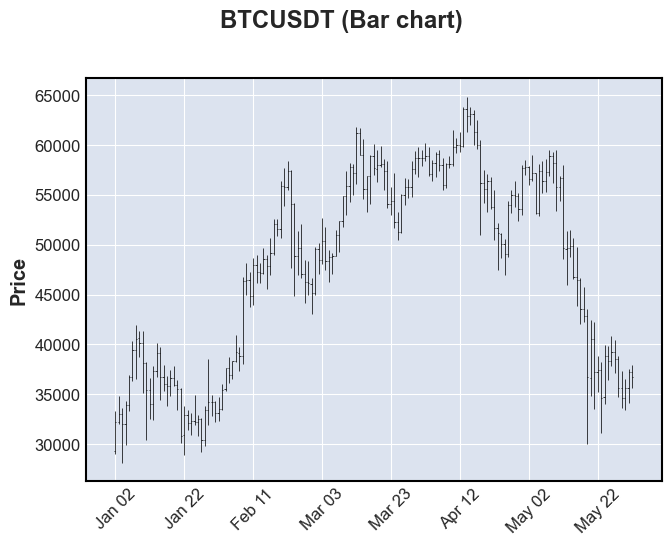

In [23]:
import mplfinance as mpf

# To plot simple bar chart
mpf.plot(hist_df.set_index('Close Time'),title= 'BTCUSDT (Bar chart)')


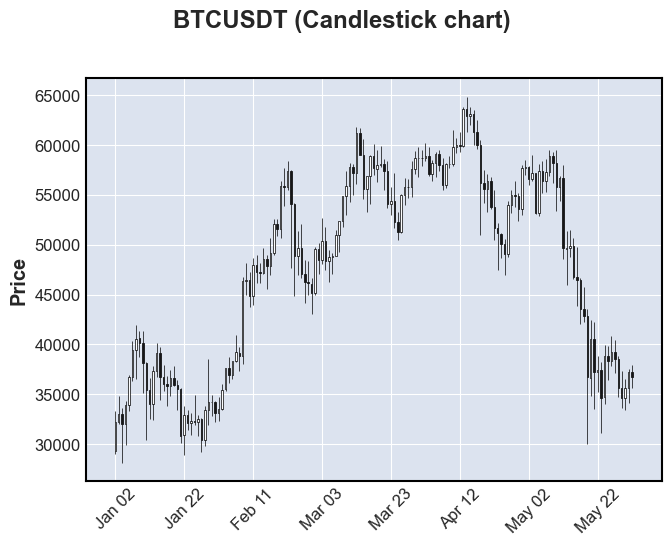

In [24]:
# To plot candlestick chart
mpf.plot(hist_df.set_index('Close Time'), type='candle',title= 'BTCUSDT (Candlestick chart)')


# Plotting moving averages along the chart


 - The MA numbers we are going to use are as follows :

- **13**
- **21**
- **55**

 - The reason behind these numbers are that these are fibonacci numbers and important too for trading as these are used by institutions to buy certain assets when the price of the asset touches these fibonacci(s) moving averages and bounces of it.

 - And if the price fails to held that moving average as support, they sell the asset or reduce the position size to manage risk.


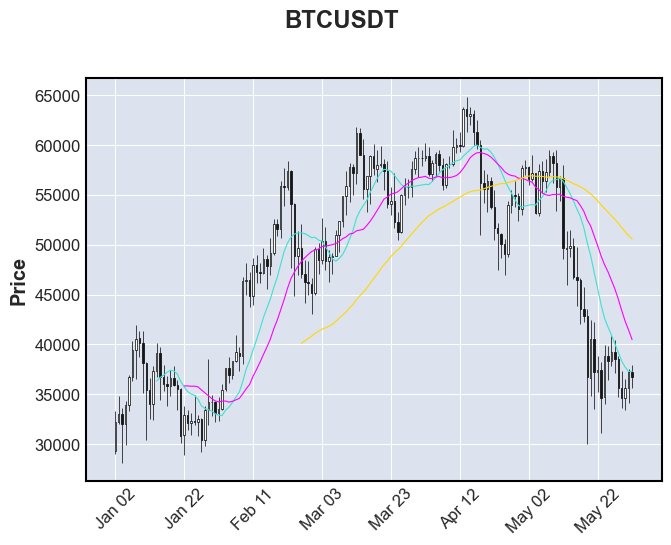

In [25]:
# To plot candlestick chart with SMA
mpf.plot(hist_df.set_index('Close Time'),
         type='candle', mav=(13, 21, 55), title='BTCUSDT')

# grey line = 13 MA
# blue line = 21 MA
# yellow line = 55 MA (default color style )


### grey line = 13 MA

### blue line = 21 MA

### yellow line = 55 MA (default color style)


 In the above chart, you can see that 55 MA initial starting point is 55 candles after because to plot daily 55 MA you atleast need 55 days of data beforehand to calculate the daily 55 MA. Similarly with the 13 MA and 21 MA and is illustrated in below 2 charts :


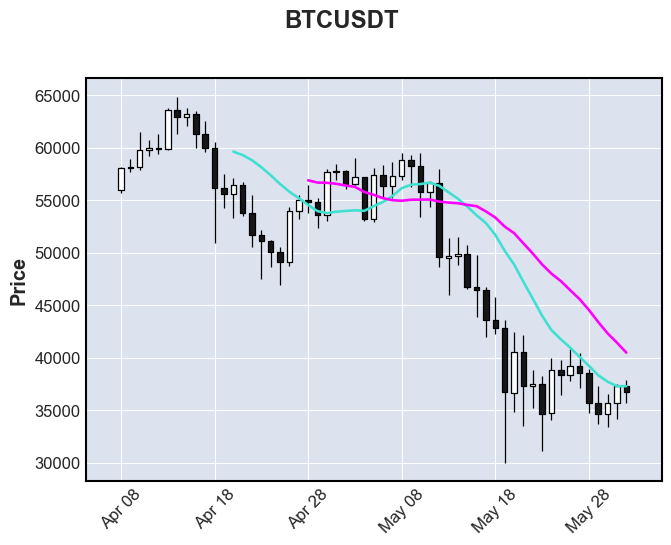

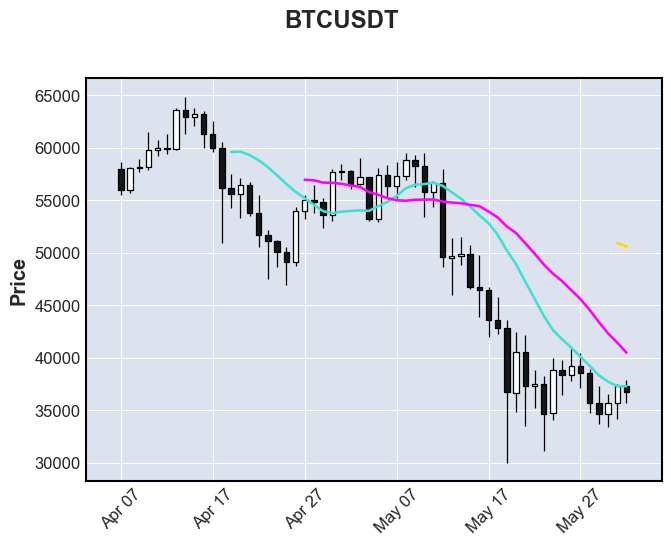

In [26]:
mpf.plot(hist_df.set_index('Close Time').tail(55),
         type='candle', mav=(13, 21, 55), title='BTCUSDT')

mpf.plot(hist_df.set_index('Close Time').tail(56),
         type='candle', mav=(13, 21, 55), title='BTCUSDT')


## **Prettifying charts and puting it all together**

### - Tight-layout

Note that there is a gap at the beginning and end of the chart.
If the chart can expand to include the entire area by setting tight_layout=True similar to matplotlib.

### - Adding title

Title can be added by provindng the title after title keyword.

### - Figure size

figratio is the mplfinance keyword, similar to figsize in matplotlib, which is used to set the figure size.

### - Chart styles

We are so accustomed with red candle symbolizing drop in price and green representing increase in price. These type of color schemes are popularized by financial publications, trading apps and financial news channels. This color coding lets us assimilate the information better.
Mplfinance has several built-in styles :
**['binance', 'blueskies', 'brasil', 'charles','checkers', 'classic', 'default', 'ibd','kenan','mike', 'nightclouds', 'sas','starsandstripes', 'yahoo']**


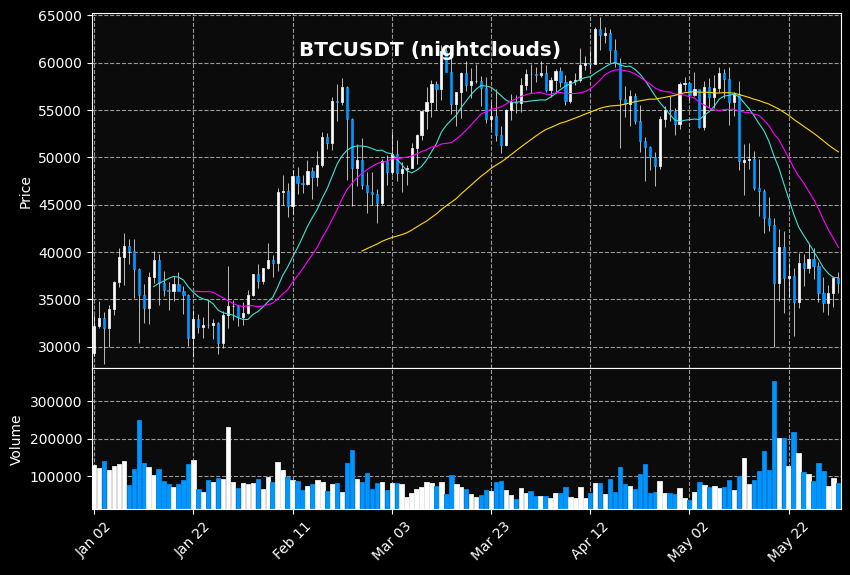

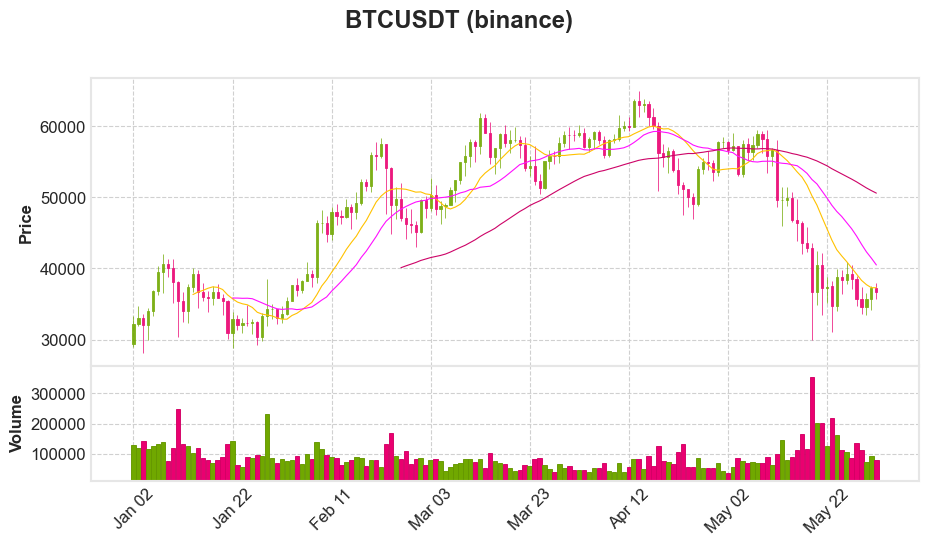

In [27]:
mpf.plot(hist_df.set_index('Close Time'),
         type='candle', mav=(13, 21, 55), title='BTCUSDT (nightclouds)', volume=True, style='nightclouds', tight_layout=True, figratio=(15, 10))

mpf.plot(hist_df.set_index('Close Time'),
         type='candle', mav=(13, 21, 55), title='BTCUSDT (binance)', volume=True, style='binance', tight_layout=False, figratio=(10, 5))
